# Examining Various Relationships Between American Industries and the Amount of Greenhouse Gases Produced

#### Dataset Link: 

https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-v1-3-by-naics-6

#### First, we need to install the proper packages...

In [5]:
!pip install pandas
!pip install seaborn
!pip install numpy
!pip install matplotlib

#### Great! Now we need to import the libraries...

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Now we need to read in the data file! This data is from the US Environmental Protection Agency, and it lists greenhouse gas emissions data for the 2022 year.

##### __Note__ that the values for the columns... 
- "Supply Chain Emission Factors without Margins"
- "Margins of Supply Chain Emission Factors"
- "Supply Chain Emission Factors with Margins"
##### ...are all in __kg of $CO_{2}$ per US dollar__. In other words, the unit of measurement is __kilograms of $CO_{2}$ produced for every US dollar a consumer spends on that service/good__.

Basically, we as consumers have a lot of power with our dollars!

In [18]:
df = pd.read_csv("supply-chain_ghg_emissions.csv")
df

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
...,...,...,...,...,...,...,...,...
1011,813910,Business Associations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128,813B00
1012,813920,Professional Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128,813B00
1013,813930,Labor Unions and Similar Labor Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128,813B00
1014,813940,Political Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128,813B00


#### Awesome! Now that we can see what the data looks like as a whole, let's take a look at what data types we have in this dataset!

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                1016 non-null   int64  
 1   2017 NAICS Title                               1016 non-null   object 
 2   GHG                                            1016 non-null   object 
 3   Unit                                           1016 non-null   object 
 4   Supply Chain Emission Factors without Margins  1016 non-null   float64
 5   Margins of Supply Chain Emission Factors       1016 non-null   float64
 6   Supply Chain Emission Factors with Margins     1016 non-null   float64
 7   Reference USEEIO Code                          1016 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 63.6+ KB


#### Cool Cool! Now let's start cleaning the data by looking to see if we have any null values!

Cleaning the data is important, as it lets us know if we have null values, duplicate values, and so on! On this particular dataset, we are going to check for null values and duplicate values. We are also going to be dropping the "Reference USEEIO Code column", as this particular column won't help us in our analysis.

In [25]:
clean_df = df
clean_df.isnull().sum()

2017 NAICS Code                                  0
2017 NAICS Title                                 0
GHG                                              0
Unit                                             0
Supply Chain Emission Factors without Margins    0
Margins of Supply Chain Emission Factors         0
Supply Chain Emission Factors with Margins       0
Reference USEEIO Code                            0
dtype: int64

#### Wow! No null values! This is great! Let's see if we have any duplicates now! 

In [29]:
print("Number of duplicates present:", clean_df.duplicated().sum())

Number of duplicates present: 0


#### Yay! No duplicates! This means that every entry in our dataset is unique! Now we are going to drop the "Reference USEEIO Code" column...

In [63]:
clean_df.drop("Reference USEEIO Code", axis = 1)

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848
...,...,...,...,...,...,...,...
1011,813910,Business Associations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128
1012,813920,Professional Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128
1013,813930,Labor Unions and Similar Labor Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128
1014,813940,Political Organizations,All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128


#### Sweet! Notice how the "Reference USEEIO Code" column has now been dropped? 
#### Now we can start the visualization process! 
#### We are going to look into one particular aspect of the data...

-  Which industries produce the most greenhouse gas emissions?

We want to utilize this general insight to analyze other facets of our data. By looking to see which industries produce the most emissions we can then further examine trends of high-emitting industries! 

#### Great! Let's visualize our first question:
__Which industries produce the most greenhouse gas emissions?__

Now that we have defined our problem, we'll want to figure out exactly how we are going to visualize our data. To start, this dataset has LOTS and LOTS of emissions values for _various_ industries. So, we'll only select the __top ten__ industries to look at. We will examine their emissions output based off their "Supply Chain Emission Factors without Margins".

We should also double-check the names of our columns, since they are a bit longer.

In [88]:
print(clean_df.columns.tolist())

['2017 NAICS Code', '2017 NAICS Title', 'GHG', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Reference USEEIO Code']



##### Cool cool! Now that we for sure know the names of our columns, let's continue on!

Here we will use the _nlargest_ Pandas function to find out the top ten industries with the "Supply Chain Emission Factors without Margins".

In [131]:
top_10_df = clean_df.nlargest(10, 'Supply Chain Emission Factors without Margins')
top_10_df

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
285,327310,Cement Manufacturing,All GHGs,"kg CO2e/2022 USD, purchaser price",3.846,0.078,3.924,327310
30,112111,Beef Cattle Ranching and Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",2.847,0.045,2.893,1121A0
31,112112,Cattle Feedlots,All GHGs,"kg CO2e/2022 USD, purchaser price",2.847,0.045,2.893,1121A0
33,112130,Dual-Purpose Cattle Ranching and Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",2.847,0.045,2.893,1121A0
32,112120,Dairy Cattle and Milk Production,All GHGs,"kg CO2e/2022 USD, purchaser price",1.682,0.042,1.724,112120
653,486110,Pipeline Transportation of Crude Oil,All GHGs,"kg CO2e/2022 USD, purchaser price",1.619,0.000,1.619,486000
654,486210,Pipeline Transportation of Natural Gas,All GHGs,"kg CO2e/2022 USD, purchaser price",1.619,0.000,1.619,486000
655,486910,Pipeline Transportation of Refined Petroleum P...,All GHGs,"kg CO2e/2022 USD, purchaser price",1.619,0.000,1.619,486000
656,486990,All Other Pipeline Transportation,All GHGs,"kg CO2e/2022 USD, purchaser price",1.619,0.000,1.619,486000
290,327410,Lime Manufacturing,All GHGs,"kg CO2e/2022 USD, purchaser price",1.560,0.063,1.623,327400


#### That's crazy! I wasn't expecting Cement Manufacturing to beat out everyone else, and by nearly a full point too!

This neat chart is fine and dandy, but it can be hard to truly visualize how much 'space' each industry takes up. So, let's try using a pie chart from the Pandas library to bring some more visual emphasis to this data!

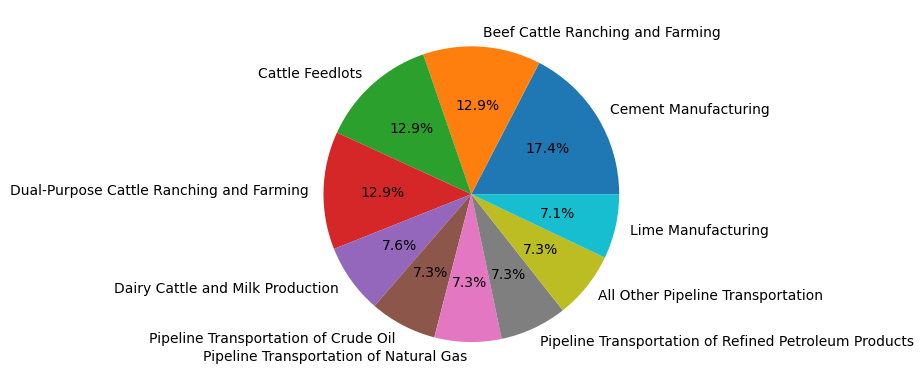

In [139]:
emissions_no_margins = top_10_df["Supply Chain Emission Factors without Margins"]
title = top_10_df["2017 NAICS Title"]
plt.pie(emissions_no_margins, labels=title, autopct='%1.1f%%')
plt.show()

#### Hmm, the pie chart looks okay, but a bar chart would probably be an even better visualization for this question!

Here we'll use a seaborn bar chart to visualize with matplotlib's .figure function and .xticks function to adjust the size and labeling!

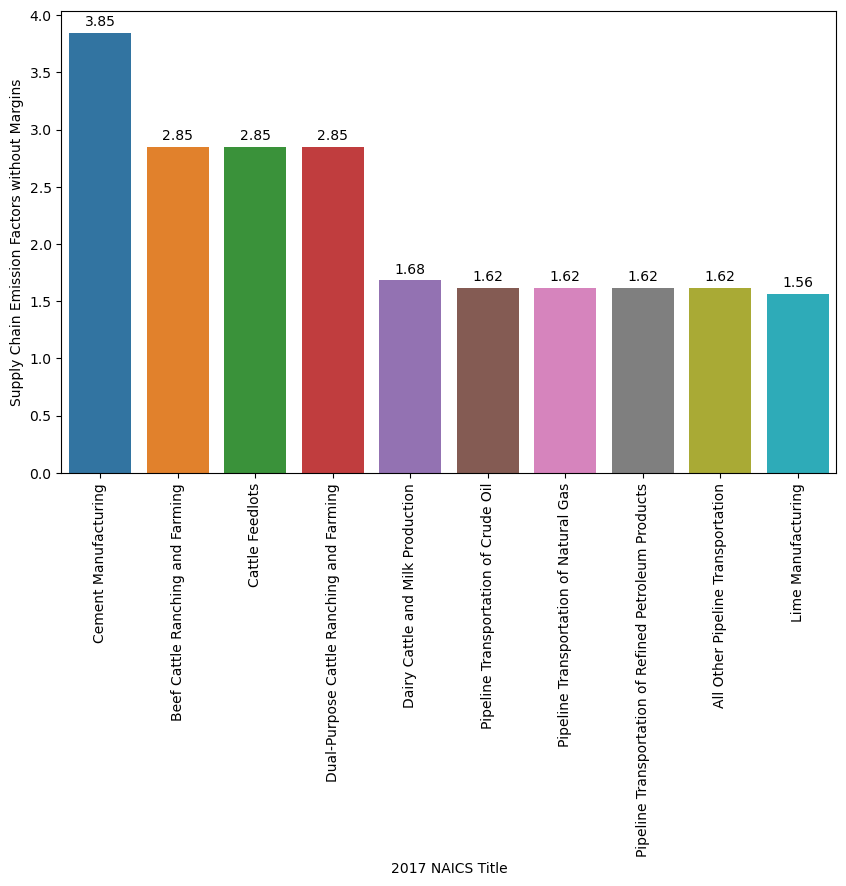

In [210]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90, ha='center')
e_bar = sns.barplot(x=title, y=emissions_no_margins, hue=title)
for container in e_bar.containers:
    e_bar.bar_label(container, fmt='%.2f', fontsize=10, color='black', padding=3)
plt.show()

#### Awesome! I think it's pretty safe to say that we've answered our first question about this dataset:
__Which industries produce the most greenhouse gas emissions?__

#### What does this mean?

We can see that from the EPA's 2022 data, the Cement Manufacturing industry has beaten out everyone else in terms of kg of $C0_{2}$ produced per USD. With even more data and visualizations, we could probably see some trends aligning with the construction industry or even with infrastructure creation/maintenance. 

We should also examine the other industries that made the top ten. 

If we are to separate the 10 specific industries into more general fields, there is a pretty strong case for these two:
- Industrial Manufacturing
- Cattle Agriculture

The dataset used for this project is very broad and does its best to encompass _all_ American industries, and as a result, there is no information on how greenhouse gas emissions are split _within_ these industries. In other words, we don't know the __allocation__ of emissions within these fields. Are they mostly due to the transportation, the creation, or the implementation of these goods/services? With further examination and more datasets, these questions can be answered. As of now, this data narrows down where most greenhouse gases are being emitted from, and that's as good a start as any!